In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

# Saving the model
import pickle

## to ignore waarning
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection


In [2]:
df=pd.read_csv("Fraudalent_transactions.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


# A] Having an Overview of the data set

### Null Value Synopsis

In [4]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


<AxesSubplot:>

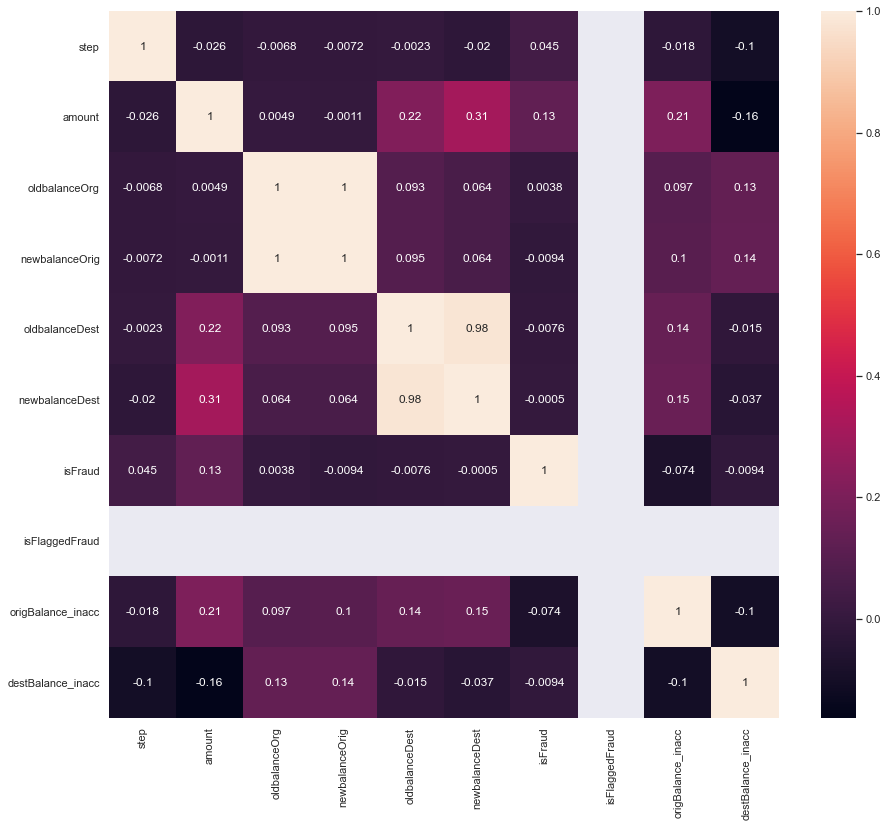

In [93]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),annot=True)

In [8]:
#we have all 0s & 1s in our Target Feature and its a binary classification problem
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [9]:
# checking whether the data is balanced or not. 
# and it seems the dataset is imbalanced, so to deal with imbalanceness we will introduce class_weights while building the model

df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

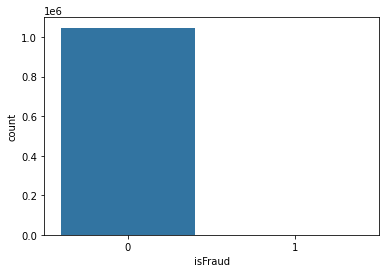

In [10]:
# Visualizing the distribution of the Target variable

sns.countplot(df['isFraud'])
plt.show()

In [11]:
df.shape

(1048575, 11)

In [12]:
# non fradulent transactions are 

100*(1047433/1048575)

99.89109028920201


There is almost a 99%-.1% distribution of the Target values which seems data is highly unbalanced

To deal with imbalanced data we will use class_weights as this is a finance dataset, because for the finance dataset if use oversampling or undersampling or smote they will create fake data points or duplicate data points, in the financial problems we need accurate information otherwise it will mislead us and we may end up with a bad model.

so we give different weights to both the majority and minority classes. The whole purpose is to penalize the misclassification made by the minority class by setting a higher class weight and at the same time reducing weight for the majority class, which helps us optimize the scoring for the minority class and the algorithm could focus on reducing the errors for the minority class


# Outlier synopsis

## Carrying out Outlier Treatment using IQR method:

q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

print('Shape before Outlier Treatment :',df.shape)

df = df[~((df < (q1-(iqr*1.5))) | (df > (q3+(iqr*1.5)))).any(axis=1)].reset_index(drop=True)

print('Shape before Outlier Treatment :',df.shape)

## Thus, all outliers have been treated.

#### we wont treat the outliers by traditional method we will look for absurd transaction amounts later to remove the data

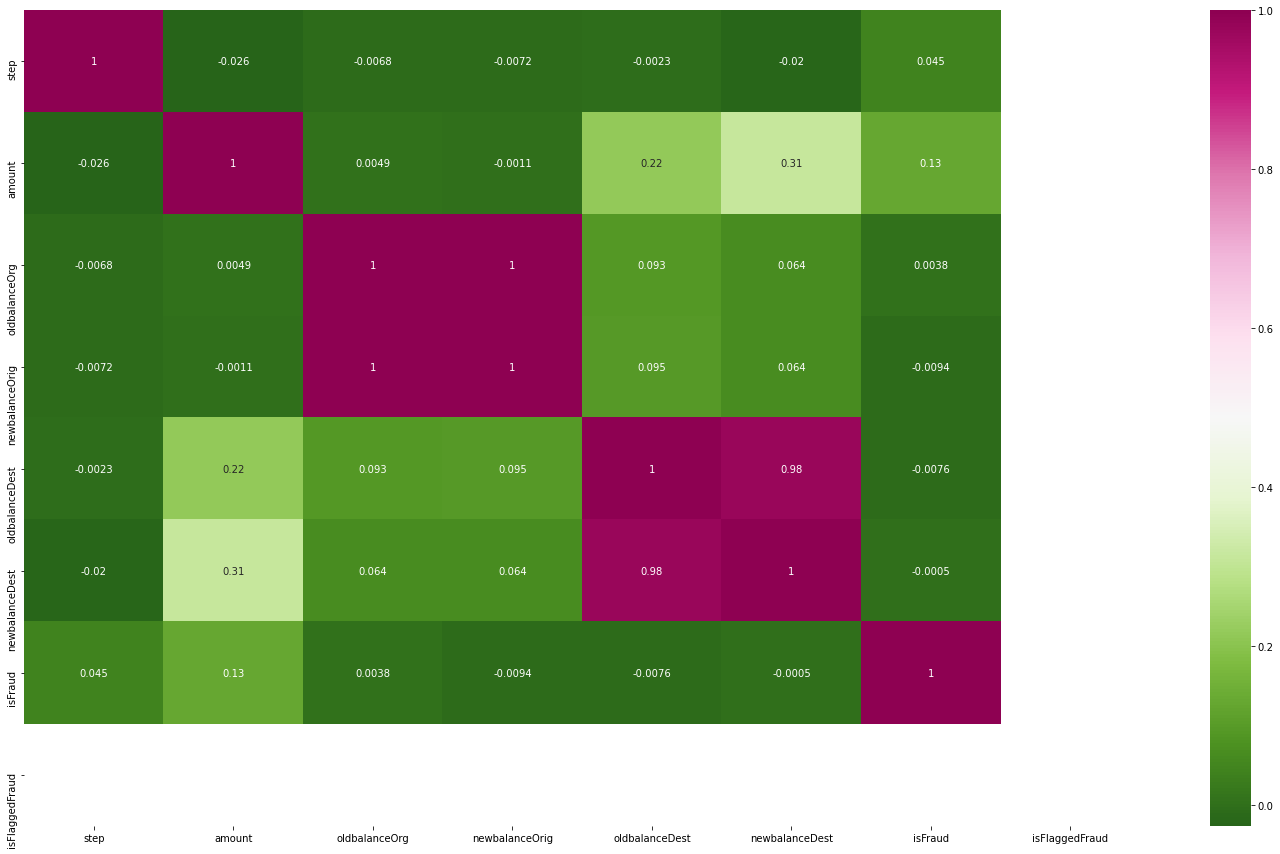

In [13]:
corr = df.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, cmap="PiYG_r")
plt.show()

# Multicollinearity synopsis

Here we can observe that there are some independent variables correlated with each other.

1.    Input features oldbalanceDest and newbalanceDest are correlated with each other so we had to drop one of the feature. To decide which one to drop amongst them we have to check their correlation with dependent feature (isFraud), oldbalanceDest is highly negatively correlated (-0.0059) with target feature than newbalanceDest (0.00054). here i have to drop the newbalanceDest feature.

2.    likewise above oldbalanceOrig and newbalanceOrig are also correlated with each other and newbalanceOrig is highly negatively correlated (-0.0081) with target feature than oldbalanceOrg (0.01). here i have to drop the oldbalanceOrg feature.

   now i have to drop newbalanceDest and oldbalanceOrig from the data

# B] Data Visualization and Exploratory Data Analysis (EDA)

In [14]:
#Plotting Pie Graphs in order to visualize to see the distributions

In [15]:
df['type'].value_counts()


CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

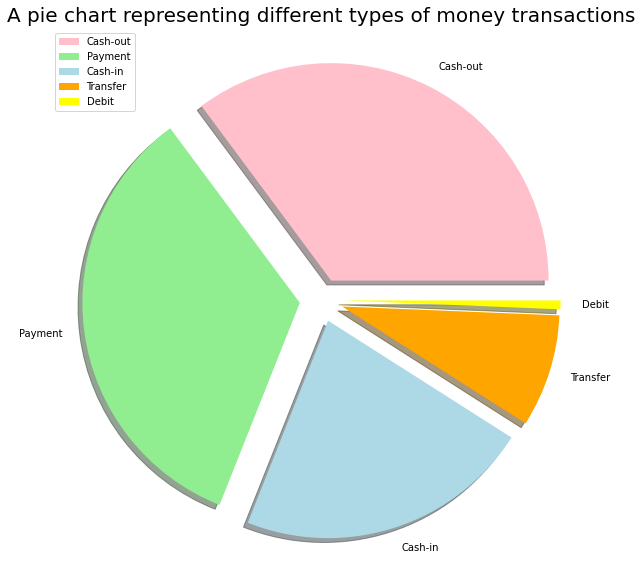

In [76]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [17]:
#The most frequent transaction types are CASH-OUT and PAYMENT

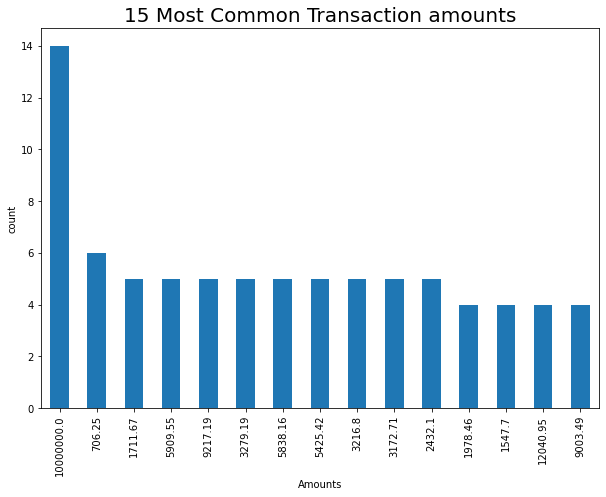

In [78]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (10, 7)

df['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

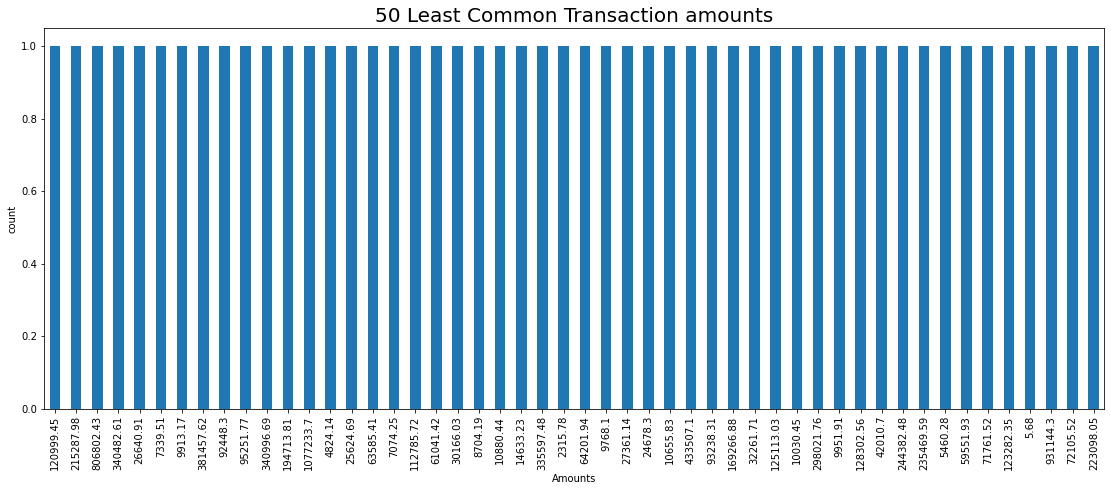

In [81]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (19, 7)

df['amount'].value_counts().tail(50).plot.bar()
plt.title('50 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

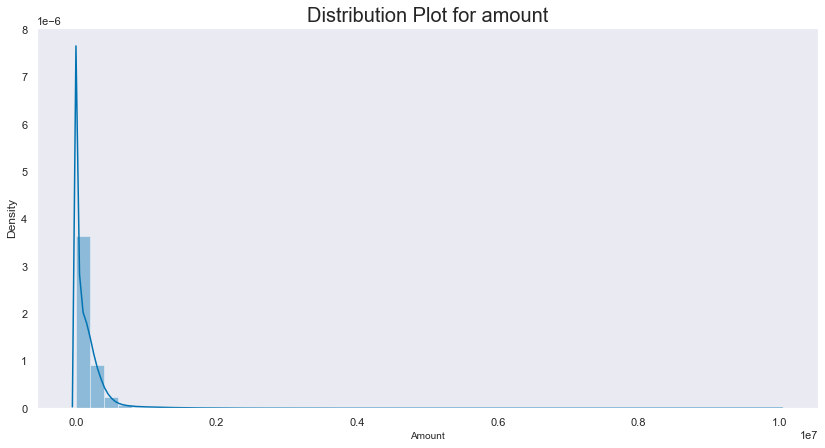

In [84]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# setting the style in seaborn
sns.set(style = 'dark', palette = 'colorblind')

#plotting a dist plot
ax = sns.distplot(df.amount)
ax.set_title(label = 'Distribution Plot for amount', fontsize = 20)
ax.set_xlabel(xlabel = 'Amount', fontsize = 10)
plt.show()

### Fraud Transactions by Transaction Type


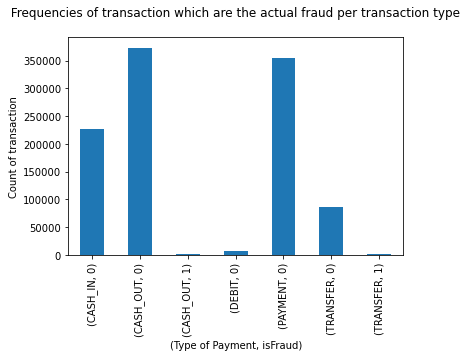

In [18]:
fraud_type = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
fraud_type.set_title(" Frequencies of transaction which are the actual fraud per transaction type \n" )
fraud_type.set_xlabel("(Type of Payment, isFraud)")
fraud_type.set_ylabel("Count of transaction")
plt.show()

Text(0.5, 0, 'Transaction Type')

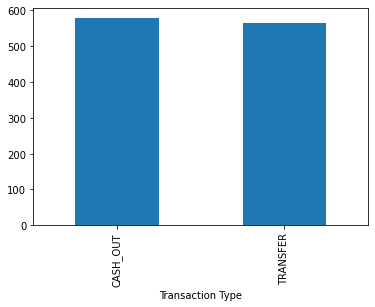

In [19]:

#Split of Fraud Transactions by Transaction Type
fraud = df['isFraud'].isin([1])

fraud_time = df[fraud].groupby(['type']).size().plot(kind='bar')
fraud_time.set_xlabel("Transaction Type")

In [20]:


#The fraudulent transactions are splitted in an equal percentage.

#Only CASH-OUT and TRANSFER transactions can be fraudulent.


Checking the account balance is matching before transaction and after the transaction for both originator and recipient¶

In [21]:
print("Are there any mismatch in the balance at origin and destination after transaction?")

df['origBalance_inacc'] = (df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"]).astype(int)
df['destBalance_inacc'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceDest"]).astype(int)

print("Balance Error(%) at the origin:",round(df['origBalance_inacc'].value_counts()[1]/df.shape[0] * 100,2))

print("Balance Error(%) at the destination:",round(df['destBalance_inacc'].value_counts()[1]/df.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the origin: 84.44
Balance Error(%) at the destination: 81.11



Checking Whether there is there any Transaction Amounts that are Negative or Zero

we have to check if the amount column is always positive or not ?


In [22]:
print("Number of transactions with amount less  than 0?")
print(len(df[df.amount<0]))

print("Number of transactions with amount is equal to 0?")
print(len(df[df.amount==0]))




Number of transactions with amount less  than 0?
0
Number of transactions with amount is equal to 0?
0


In [23]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [24]:
type_map = {
    'PAYMENT':'OTHERS',
    'TRANSFER':'TRANSFER',
    'CASH_OUT':'CASH_OUT',
    'DEBIT':'OTHERS',
    'CASH_IN':'OTHERS'
}

In [25]:
df['type'] = df['type'].map(type_map)

df['type'].unique()

array(['OTHERS', 'TRANSFER', 'CASH_OUT'], dtype=object)

In [26]:
#Fraud and Non-Fraud Transactions Count by Time Step

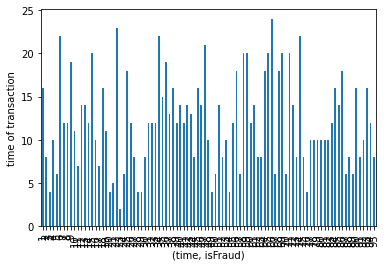

In [27]:
fraud = df['isFraud'].isin([1])

fraud_time = df[fraud].groupby(['step']).size().plot(kind='bar')
fraud_time.set_xlabel("(time, isFraud)")
fraud_time.set_ylabel("time of transaction")
plt.show()

The fraud transactions are almost uniformly spread out across time steps, so this variable is not giving us any information which might impact the target variable. so its better to drop this variable.

In [28]:

#Train-Test Split


##3 Ans
### Selection of columns is done by finding multicollinarity and uniformity in steps

In [29]:
 #deleting the unnecessary varibles from input data

X = df.drop(columns=['step', 'newbalanceDest','oldbalanceOrg','nameOrig','nameDest','isFlaggedFraud','isFraud'])

In [30]:
X.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc
0,OTHERS,9839.64,160296.36,0.0,0,1
1,OTHERS,1864.28,19384.72,0.0,0,1
2,TRANSFER,181.00,0.00,0.0,0,1
3,CASH_OUT,181.00,0.00,21182.0,0,1
4,OTHERS,11668.14,29885.86,0.0,0,1


In [31]:
y = df['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [32]:
y.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# C] Data Preprocessing


Handling Categorical - Nominal Features (Encoding)
One Hot Encoding

In [34]:
dummies_type = pd.get_dummies(X_train['type'], prefix='type', drop_first=True)

In [35]:
X_train = pd.concat([X_train, dummies_type], axis=1)

In [36]:
X_train.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_OTHERS,type_TRANSFER
664918,CASH_OUT,352265.95,0.00,1830686.45,1,1,0,0
741964,OTHERS,6839.81,0.00,0.00,1,1,1,0
314050,OTHERS,189558.87,1337776.35,608722.11,1,1,1,0
631759,OTHERS,11593.26,0.00,0.00,1,1,1,0
555223,CASH_OUT,109714.54,0.00,85409.59,1,1,0,0


In [37]:
X_train = X_train.drop(columns=['type'])

Preprocessing the Test Data separately
Nominal Features (To OneHot Encode)

In [38]:
dummies_type = pd.get_dummies(X_test['type'], prefix='type', drop_first=True)

In [39]:
X_test = pd.concat([X_test, dummies_type], axis=1)

In [40]:
X_test.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_OTHERS,type_TRANSFER
781974,TRANSFER,574748.85,0.00,0.00,1,0,0,1
937737,OTHERS,21118.84,10500000.00,2689219.94,1,1,1,0
907828,OTHERS,26551.78,47114.71,0.00,1,1,1,0
784628,OTHERS,7819.09,0.00,0.00,1,1,1,0
662460,CASH_OUT,312914.21,0.00,1310916.68,1,1,0,0


In [41]:
X_test = X_test.drop(columns=['type'])

(X_train.columns == X_test.columns).all()



True

# Model Building(Logistic Regression)

In [42]:
lr = LogisticRegression(class_weight="balanced")

lr_model = lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.5379186775713088


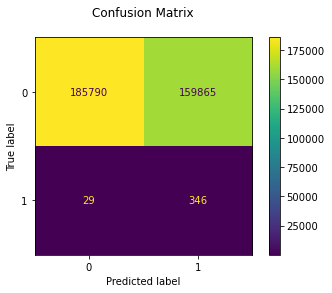

In [43]:
y_pred = lr_model.predict(X_test)

plot_confusion_matrix(lr_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()



In [44]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.54      0.70    345655
           1       0.00      0.92      0.00       375

    accuracy                           0.54    346030
   macro avg       0.50      0.73      0.35    346030
weighted avg       1.00      0.54      0.70    346030



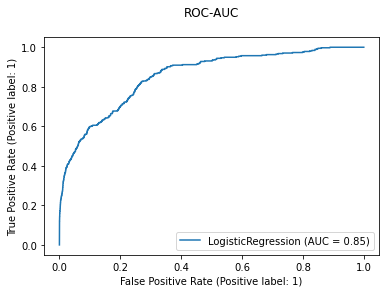

In [45]:
plot_roc_curve(lr_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

# RandomForest Algorithm implemetation


In [46]:
rf = RandomForestClassifier(class_weight="balanced")

rf_model = rf.fit(X_train, y_train)

rf_model.score(X_test, y_test)




0.9999682108487703

### Tuning the Hyperparameters of RandomForest Model

In [47]:
rf_params = {
    'n_estimators' : [50,100,130,150],
    'max_depth' : [4,5,1,2,None],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,4,10,20],
    'max_leaf_nodes' : [2,5,10,None]
    
}

rf_rs = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=5)

rf_best_model = rf_rs.fit(X_train, y_train)

rf_best_model.score(X_test, y_test)



0.9999682108487703

In [49]:
rf_best_model.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 10,
 'max_depth': 5}

In [50]:
rf_best_model.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=150)

In [ ]:
#Random Forest Model Performance

In [51]:
y_pred = rf_best_model.predict(X_test)

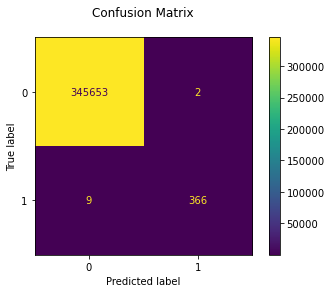

In [52]:
plot_confusion_matrix(rf_best_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [53]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    345655
           1       0.99      0.98      0.99       375

    accuracy                           1.00    346030
   macro avg       1.00      0.99      0.99    346030
weighted avg       1.00      1.00      1.00    346030



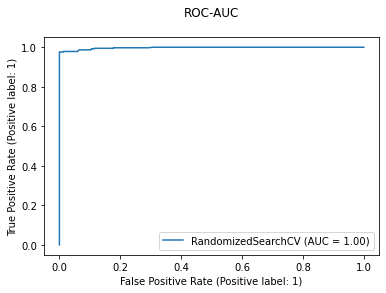

In [54]:
plot_roc_curve(rf_best_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

# Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X_train,y_train)
predictions = gnb_model.predict(X_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    345655
           1       0.02      0.28      0.04       375

    accuracy                           0.99    346030
   macro avg       0.51      0.63      0.52    346030
weighted avg       1.00      0.99      0.99    346030



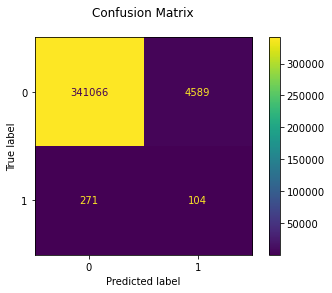

In [60]:
plot_confusion_matrix(gnb_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

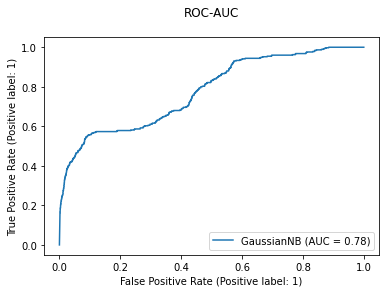

In [61]:
plot_roc_curve(gnb_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

In [64]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()

xgb_model=xgb.fit(X_train,y_train)

xgb_model

[17:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
y_pred = xgb_model.predict(X_test)

In [67]:
predictions = xgb_model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    345655
           1       1.00      0.98      0.99       375

    accuracy                           1.00    346030
   macro avg       1.00      0.99      0.99    346030
weighted avg       1.00      1.00      1.00    346030



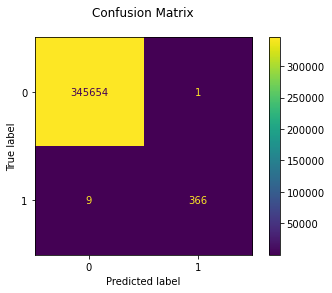

In [68]:
plot_confusion_matrix(xgb_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

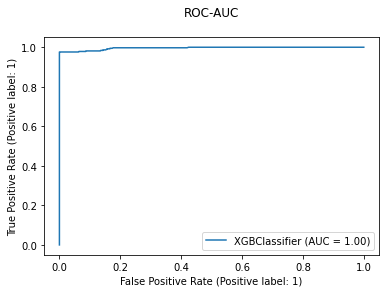

In [69]:
plot_roc_curve(xgb_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

### Hyperparameter Tuning for Xgb

In [88]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
XGB = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
XGB_grid = GridSearchCV(estimator = XGB, param_grid = tuning_parameters, cv = 3, scoring = 'recall')

# fit the model on X_train and y_train using fit()
XGB_model= XGB_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', XGB_model.best_params_, '\n')

[18:17:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:17:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:18:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:18:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [89]:
y_pred = XGB_model.predict(X_test)

In [90]:
predictions = XGB_model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    345655
           1       0.99      0.98      0.99       375

    accuracy                           1.00    346030
   macro avg       1.00      0.99      0.99    346030
weighted avg       1.00      1.00      1.00    346030



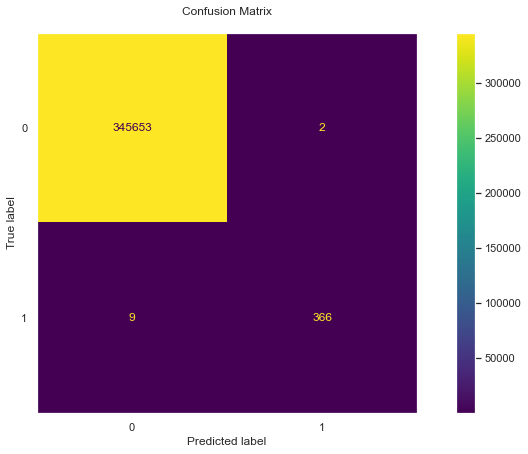

In [91]:
plot_confusion_matrix(XGB_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

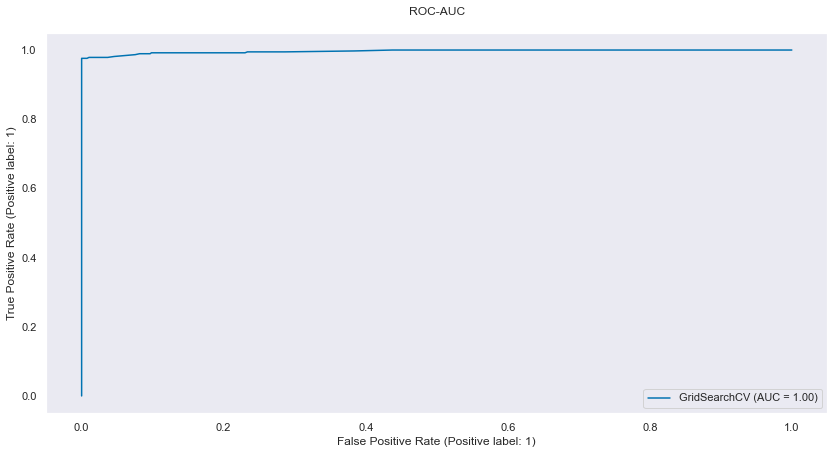

In [92]:
plot_roc_curve(XGB_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

# 5 key factors 

In [73]:
from xgboost import plot_importance

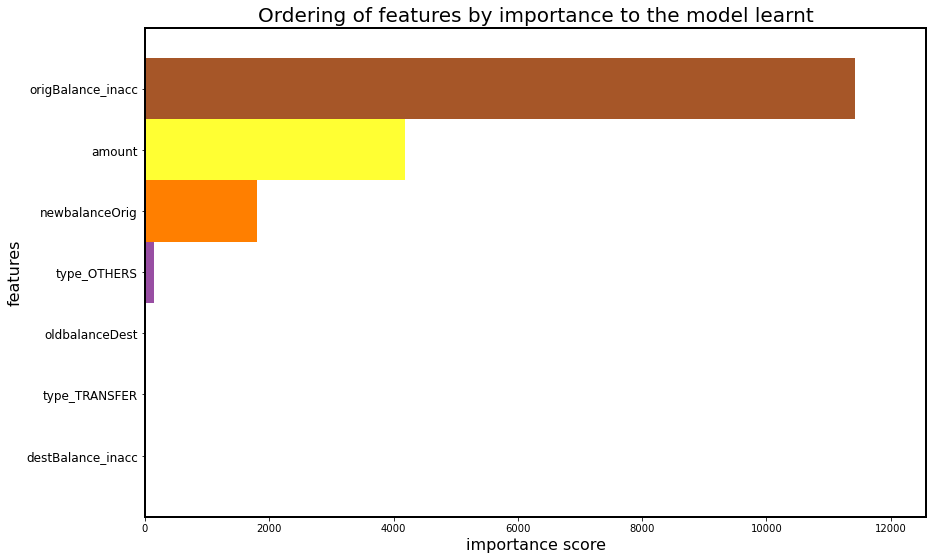

In [75]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(xgb_model, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);